# Módulo 10: Clustering y detección de anomalías

## Descubriendo Estructuras No Convencionales: DBSCAN aplicado a make_moons

En esta actividad vamos a construir un modelo de **clustering** utilizando el algoritmo **DBSCAN**, visto en los apuntes.

Para ello, vamos a emplear un dataset generado con la función `make_moons()` de la librería **Scikit-Learn**. Este dataset, comúnmente utilizado para problemas de clasificación binaria, genera datos con una distribución en forma de **dos medias lunas entrelazadas**. Además, permite controlar el **nivel de ruido** y la **cantidad de muestras** mediante sus parámetros, lo que lo convierte en una excelente opción para probar algoritmos de agrupamiento no lineales.

En primer lugar, vamos a importar todas las librerías necesarias para llevar a cabo este ejercicio.

In [78]:
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

### <font color='red'>**Actividad 1:**</font>
**a)** Utilizando el método [make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) crear un dataset de **500 ejemplos** con un ruido equivalente a una desviación estándar de **0.1**. Este método devuelve por defecto dos variables: los **features**, que almacenaremos en la variable **X**, y los **labels**, que almacenaremos en la variable **y**.

In [11]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42) #generar un dataset bidimensional
X.shape

(500, 2)

En este caso, los labels (**y**) se usarán únicamente para **visualizar los clústeres** que idealmente deberíamos encontrar, pero **no se utilizarán en el entrenamiento**.

Recordemos que el **clustering** es una técnica de **aprendizaje no supervisado**, por lo tanto, no se entrena con datasets que contengan etiquetas conocidas de antemano.

Ahora que tenemos las variables **X** e **y** creadas, vamos a visualizar los primeros datos creando un DataFrame de pandas.

In [34]:
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
1,0.830676,-0.409936
0,0.798355,0.837612
1,1.050468,-0.485162
0,-0.258143,0.980008
0,0.330682,1.147633


Veamos cómo quedaría el **gráfico de dispersión** de los datos creados, utilizando los **labels provistos** por el método `make_moons()`.

Text(0, 0.5, '$x_2$')

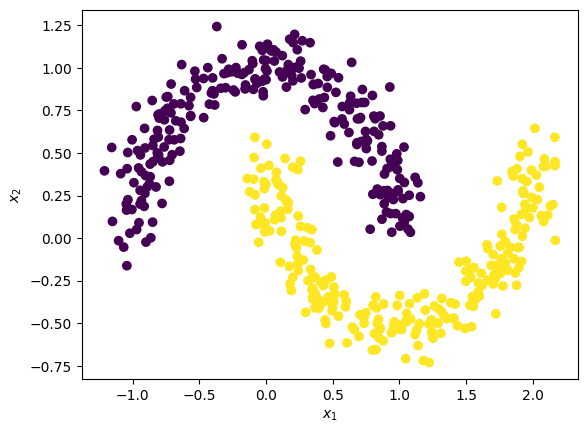

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
#nota: usamos y solamente para poder marcar con un color cada grupo y ver visualmente la distribucion

### <font color='red'>**Actividad 2:**</font>
**a)** Con el dataset creado, usando solo los **features (X)**, vamos a construir un modelo de **clustering** utilizando el algoritmo **DBSCAN**, y lo ajustaremos a los datos.

En este caso, vamos a utilizar los **valores por defecto** de los parámetros **eps** y **min_samples**. El modelo resultante lo almacenaremos en una variable llamada **dbscan_cluster1**.

In [56]:
#no le pasamos parametros, por defecto usa 0.5 y 5 respectivamente
# recordando: eps es el radio de la vecindad alrededor de un punto
dbscan_cluster1 = DBSCAN()
#entrenamos el modelo
dbscan_cluster1.fit(X)

DBSCAN()

Con el modelo creado, visualicemos en el **gráfico de dispersión** los **clusters encontrados**.

Text(0, 0.5, '$x_2$')

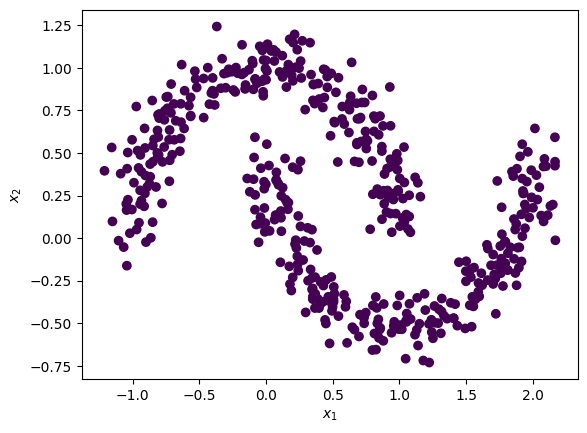

In [57]:
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Veamos ahora la **cantidad de clústeres** y de **puntos de ruido** encontrados al utilizar los valores por defecto de **eps** y **min_samples**.

In [66]:
labels=dbscan_cluster1.labels_
N_clusters=len(set(labels))-(1 if -1 in labels else 0)
print('Cantidad de clústers estimados: %d' % N_clusters)

Cantidad de clústers estimados: 1


In [67]:
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Cantidad de puntos de ruido: %d' % n_noise)

Cantidad de puntos de ruido: 0


Como podemos observar, el modelo creado encontró un **único clúster** y **ningún punto de ruido**.

Veamos ahora qué sucede si creamos un nuevo modelo con otros valores de **eps** y **min_samples**. El objetivo es que el modelo sea capaz de detectar **2 clústeres**.

### <font color='red'>**Actividad 3:**</font>
Creamos un modelo de **DBSCAN** con un valor de **eps** de **0.1** y un valor de **min_samples** de **8**. El modelo creado lo almacenamos en una variable llamada **dbscan_cluster2**.

In [68]:
#entrenamos con valores dados en la consigna
dbscan_cluster2 = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster2.fit(X)

DBSCAN(eps=0.1, min_samples=8)

Con el modelo creado, visualizamos el **gráfico de dispersión**.

Text(0, 0.5, '$x_2$')

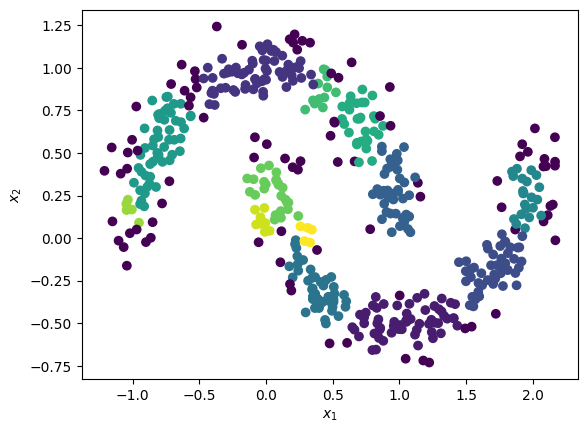

In [54]:
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster2.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

### <font color='red'>**Actividad 4:**</font>

**a)** Obtener la **cantidad de clústeres** encontrados por el modelo.

In [60]:
labels= dbscan_cluster2.labels_
N_clusters=len(set(labels))-(1 if -1 in labels else 0)
print('Cantidad de clústers estimados: %d' % N_clusters)

Cantidad de clústers estimados: 13


**b)** Obtener la cantidad de puntos de ruido

In [65]:
#.labels_ nos dice a que cluster pertenece cada ejemplo
#los puntos de ruido son los que tienen valor -1 cuando hacemos .labels_ sobre el modelo
puntos_ruido = list(labels).count(-1)
#lo pase a de array numpy a lista para aplicar el count de toda la vida en python
print(f"Cantidad de ptos ruido: {puntos_ruido}")

Cantidad de ptos ruido: 90


### <font color='red'>**Actividad 5:**</font>
¿Qué diferencia observas entre los resultados de los dos modelos? ¿Podríamos hacerlo mejor? ¿Cómo?

Claramente uno de los modelos difieren uno en cada extremo. Uno por un lado crea un solo cluster, por lo que no diferencia de ninguna forma entre ejemplos y el resultado es totalmente inutil. 
Por otro lado el segundo modelo al tener un eps o radio muy bajo crea demasiados clusteres y separa por demas hasta cuando no deberia separar.
Claramente como comprobamos en la practica este modelo es bastante sensible a los hiperparametros y definen si los resultados van a ser o no los esperados 

### <font color='red'>**Actividad 6:**</font>
Probar con diferentes valores de **eps** (dejando **min_samples = 8**) de manera que el modelo ajustado a los datos encuentre únicamente **2 clústeres**. El nuevo modelo lo almacenaremos en una variable llamada **dbscan_cluster3**.

In [74]:
dbscan_cluster3 = DBSCAN(eps=0.2, min_samples=8)
dbscan_cluster3.fit(X)

DBSCAN(eps=0.2, min_samples=8)

Despues de probar con 0.3 y 0.2 vimos que el modelo converge a una solucion deseada cuando dejamos el parametro eps en 0.2

Visualizamos el **modelo creado** en un **gráfico de dispersión**.

Text(0, 0.5, '$x_2$')

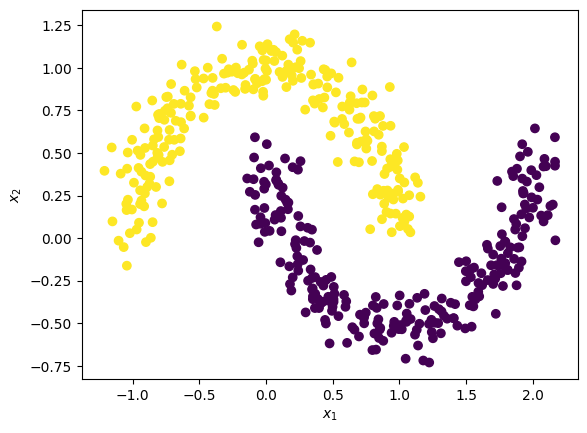

In [75]:
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster3.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Obtenemos la **cantidad de clústeres** y de **puntos de ruido** detectados por el modelo.

In [76]:
labels=dbscan_cluster3.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Cantidad de clústers: %d' % N_clus)

Cantidad de clústers: 2


In [77]:
n_noise = list(dbscan_cluster3.labels_).count(-1)
print('Cantidad de puntos de ruido: %d' % n_noise)

Cantidad de puntos de ruido: 0


### Conclusiones finales
### <font color='red'>**Actividad 7:**</font>
Analizar los **resultados obtenidos** en los **tres modelos**, explicando qué sucedió en cada caso con los valores de los **hiperparámetros** elegidos.

- Con los valores por defecto (eps 0.5 y min samples 5) = se creo UN SOLO CLUSTER, los valores se fusionaron demasiado y a pesar de que no hubo puntos de ruido (ya que TODOS se asignaron a este cluster unico) la solucion no nos sirve
- Con eps 0.1 y min samples=8 vemos claramente que se han creado demasiados clusteres. Al tener eps bajo y min samples alto se han creado MUCHOS GRUPOS PEQUEÑOS y no se agrupo de la amanera que pretendiamos
- Con eps 0.2 y min_sampes=8 finalmente llegamos al ajuste perfecto de hiperparametros que estabamos buscando. Una separacion en dos clusteres y sin puntos de ruido. Se agrupo correctamente y esta solucion SI es util